# Accident Detection through CCTV Footage using Python
---

### Import Essential Libraries

- Matplotlib: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
- Numpy: NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
- PIL: Python Imaging Library is a free and open-source additional library for the Python programming language that adds support for opening, manipulating, and saving many different image file formats.
- Tensorflow: TensorFlow is a free and open-source software library for machine learning and artificial intelligence.
- Keras: Keras is an open-source software library that provides a Python interface for artificial neural networks.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import PIL

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
# Set Image Properties

batch_size = 32
img_height = 300
img_width = 300

In [4]:
# Load Training Dataset

training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/home/auti/Datasets/accident-detection-ds/train',
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 669 files belonging to 2 classes.


In [5]:
# Load Validation Dataset

validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    '/home/auti/Datasets/accident-detection-ds/val',
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 103 files belonging to 2 classes.


In [6]:
# Load Testing Dataset

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/home/auti/Datasets/accident-detection-ds/test',
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 152 files belonging to 2 classes.


In [7]:
# Classify

class_names = training_ds.class_names

In [8]:
# AUTOTUNE

AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
# Defining the model
# Normalization and Image Processing

model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Start Training the model

training_model = model.fit(training_ds, validation_data= validation_ds, epochs = 10)

Epoch 1/10
21/21 [==============================] - 173s 8s/step - loss: 2.4127 - accuracy: 0.5874 - val_loss: 0.6026 - val_accuracy: 0.6796
Epoch 2/10
21/21 [==============================] - 161s 8s/step - loss: 0.4729 - accuracy: 0.7833 - val_loss: 1.2557 - val_accuracy: 0.6019
Epoch 3/10
21/21 [==============================] - 131s 6s/step - loss: 0.3358 - accuracy: 0.8729 - val_loss: 0.9829 - val_accuracy: 0.6602
Epoch 4/10
21/21 [==============================] - 122s 6s/step - loss: 0.1909 - accuracy: 0.9268 - val_loss: 0.6730 - val_accuracy: 0.7767
Epoch 5/10
21/21 [==============================] - 121s 6s/step - loss: 0.1635 - accuracy: 0.9357 - val_loss: 0.2236 - val_accuracy: 0.8932
Epoch 6/10
21/21 [==============================] - 121s 6s/step - loss: 0.1102 - accuracy: 0.9656 - val_loss: 0.3086 - val_accuracy: 0.8835
Epoch 7/10
21/21 [==============================] - 120s 6s/step - loss: 0.0661 - accuracy: 0.9776 - val_loss: 0.1513 - val_accuracy: 0.9223
Epoch 8/10
21

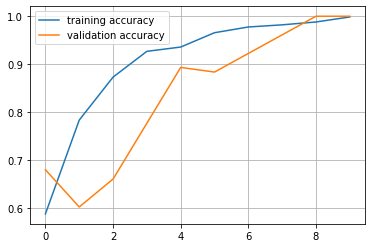

In [14]:
# Accuracy Graph Comparision

plt.plot(training_model.history['accuracy'], label = 'training accuracy')
plt.plot(training_model.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

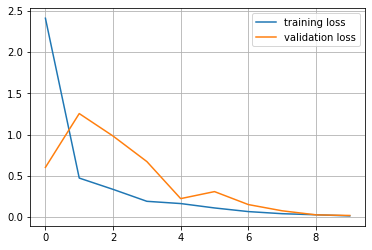

In [15]:
# Loss Graph

plt.plot(training_model.history['loss'], label = 'training loss')
plt.plot(training_model.history['val_loss'], label = 'validation loss')

plt.grid(True)
plt.legend()

In [31]:
img = tf.keras.utils.load_img(
    'images/accident/1.jpg', target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(np.argmax(score))
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

0
This image most likely belongs to Accident with a 73.11 percent confidence.


In [32]:
# Send alert if Accident is detected

import alert

if np.argmax(score) == 0:
    alert.send_alert()